# Easy Chatbot with DialoGPT, Machine Learning and HuggingFace Transformers


These past few years, machine learning has boosted the field of Natural Language Processing via Transformers. Whether it’s Natural Language Understanding or Natural Language Generation, models like GPT and BERT have ensured that human-like texts and interpretations can be generated on a wide variety of language tasks.

For example, today, we can create pipelines for sentiment analysis, missing text prediction and even speech-to-text with only a few lines of code.

One of these tasks is human-level response generation. In other words, the creation of chatbots. In this tutorial, we will explore precisely that topic. You will build a chatbot with the DialoGPT model. We already covered the foundations of this approach in a different article, so click the link if you want to understand it in more detail. Here, you will learn…

How DialoGPT works at a high level.
How you can build a chatbot with Machine Learning and Transformers.
How you can converse with your chatbot.


## DialoGPT for Neural Response Generation – a.k.a., Chatbots
Before we move on to creating code for our chatbot, I think that it’s important that we cover DialoGPT at a high level. This way, you can also understand what happens in the background hwen your code runs.

Let’s first take a look at what chatbots are. Formally, they belong to the class of models for neural response generation, or NRG. In other words, their goal is to predict a response text to some input text, as if two people are chatting.

Traditionally, chatbots have been solved in a recurrent way – with models like Long Short-Term Memory networks or LSTMs. As we know from our introduction to Transformers, these model approaches have really taken over from LSTMs thanks to the self-attention mechanism. We can therefore ask ourselves whether Transformers can also be used to improve how chatbots work.

That’s also what Zhang et al. (2019) thought. The group of authors, which works at Microsoft, is the creator of the DialoGPT Transformer. It inherits from the GPT-2 model (which itself is already a very powerful NLP model) and was trained with a custom dataset derived from Reddit. Evaluation was performed with a wide variety of datasets and tasks. It boosts the state-of-the-art in NRG, even Microsoft’s PersonalityStyle model used in Azure Cognitive Services, and is available in three flavors (117M, 345M and 762M parameters).

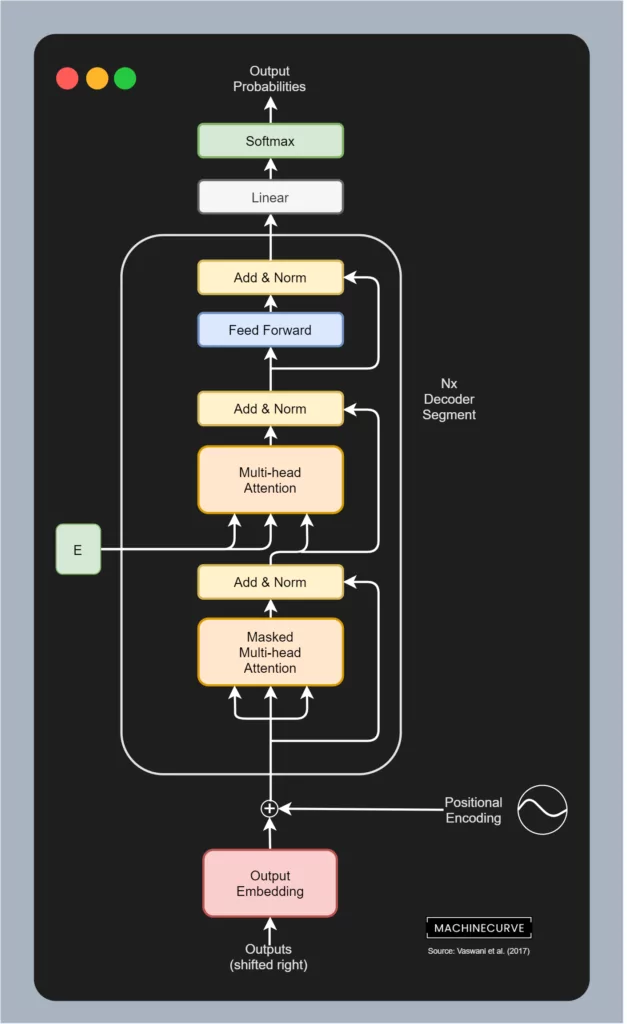

# Building a Chatbot with Transformers
Now that we have a high-level understanding about how DialoGPT works, we can actually start writing some code!

Firstly, we’ll take a look at the software dependencies that must be available on your machine for the chatbot to work. Then, we’ll cover creating the chatbot step-by-step, explaining every piece of the code that we will create. Finally, we’re going to chat with the bot that we created, to see if it works well. Let’s take a look! 🚀

## What you’ll need for the chatbot
Today’s Machine Learning based chatbot will be created with HuggingFace Transformers. Created by a company with the same name, it is a library that aims to democratize Transformers – meaning that everyone should be able to use the wide variety of Transformer architectures with only a few lines of code.

And we shall see below that creating a chatbot is really easy and can be done in approximately 50 lines.

However, in order to make it run, you will need to have installed HuggingFace Transformers onto your system, preferably in some kind of Python-based environment. You can do so with pip install transformers. Note that this also requires that Python is installed. Finally, you will also need PyTorch, because we will use torch in our code. Once you have these dependencies, you’re ready to start coding.



# Chatbot code example – explained
Let’s create a file or a Notebook – e.g. called chatbot.py and write some code! As you can see, you will create a set of Python definitions that you will execute towards the end. Let’s walk through each of them individually:

First of all, we define load_tokenizer_and_model. As you can imagine, it loads the tokenizer and the model instance for a specific variant of DialoGPT. As with any Transformer, inputs must be tokenized – that’s the role of the tokenizer. The model subsequently generates the predictions based on what the tokenizer has created. We’re using the AutoTokenizer and the AutoModelForCausalLM instances of HuggingFace for this purpose, and return the tokenizer and model, because we’ll need them later.
Do note that by default, the microsoft/DialoGPT-large model is loaded. You can also use the -medium and -small models.
Then we define generate_response. Using the tokenizer, the model, a chat_round (indicating the nth chat round) and a set of chat_history_ids, a response to some user input is generated. First of all, the user input and an End-of-String (EOS) token are encoded. These are appended to the chat history, because DialoGPT (in theory) uses the whole chat history for generating predictions. Subsequently, this is used for generating a response – but only using the 1250 most recent tokens in the input sequence. The response is finally printed and the chat_history_ids (the current response) is returned for usage in a subsequent round.

## the next step
This is followed by chat_for_n_rounds. It loads the tokenizer and model by calling the load_tokenizer_and_model definition that we created above. Subsequently, it sets the chat history to None (there is no history before the first round) and chats for n rounds by means of a for loop. The number of rounds is configurable by means of the n parameter. As you can see, this generates an iterative chatting process.
The chatbot can also be expanded so that it continues chatting forever until you give some kind of a stop word, like bye. That’s out of scope for now, but please ask for it in the comments if you’re interested in that!
Finally, we check if the '__main__' process is running (in other words, if the code is running). If so, we start the chatting process by chatting for 5 rounds. This concludes our walkthrough. As you can see, we start with relatively detailed functionalities and mix everything together towards the end.
We should have a working chatbot now! 🤖 Let’s see what it can do.

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
print('done')

done


In [3]:
def load_tokenizer_and_model(model="microsoft/DialoGPT-large"):
  """
    Load tokenizer and model instance for some specific DialoGPT model.
  """
  # Initialize tokenizer and model
  print("Loading model...")
  tokenizer = AutoTokenizer.from_pretrained(model)
  model = AutoModelForCausalLM.from_pretrained(model)
  
  # Return tokenizer and model
  return tokenizer, model

In [18]:
def generate_response(tokenizer, model, chat_round, chat_history_ids):
  """
    Generate a response to some user input.
  """
  # Encode user input and End-of-String (EOS) token
  new_input_ids = tokenizer.encode(input(">> You:") + tokenizer.eos_token, return_tensors='pt')

  # Append tokens to chat history
  bot_input_ids = torch.cat([chat_history_ids, new_input_ids], dim=-1) if chat_round > 0 else new_input_ids

  # Generate response given maximum chat length history of 2050 tokens
  chat_history_ids = model.generate(bot_input_ids, max_length=2050, pad_token_id=tokenizer.eos_token_id)
  
  # Print response
  response = "DialoGPT: {}".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0],
                                                    skip_special_tokens=True))
    
  if(len(response)>11):
      print(response)
  else:
    print("DialoGPT: sorry im not sure i understand ?")
  # Return the chat history ids
  return chat_history_ids

In [19]:
def chat_for_n_rounds(n=5):
  """
  Chat with chatbot for n rounds (n = 5 by default)
  """
  
  # Initialize tokenizer and model
  tokenizer, model = load_tokenizer_and_model()
  
  # Initialize history variable
  chat_history_ids = None
  
  # Chat for n rounds
  for chat_round in range(n):
    chat_history_ids = generate_response(tokenizer, model, chat_round, chat_history_ids)
    



In [21]:
if __name__ == '__main__':
  chat_for_n_rounds(2)

Loading model...
>> You:What is Wikipedia?
DialoGPT:  it's a website that has a wiki page.
>> You:thanks GPT?
DialoGPT: sorry im not sure i understand ?
